In [69]:
import pandas as pd
import numpy as np

1. Choose a CV or NLP problem.
2. Do a thorough Exploratory Data Analysis of the dataset.
3. Report the final performance metrics for your approach. 
4. Suggest ways in which you can improve the model.

Computer Vision (CV) Challenge: Use a pre-trained ResNet 50 and train on the Flowers dataset.

NLP Challenge: IMDB Dataset of 50K Movie Reviews to perform Sentiment analysis

In [70]:
filename = "IMDB Dataset.csv"
df = pd.read_csv(filename)

In [71]:
print(df.shape)
df.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [72]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


<AxesSubplot:>

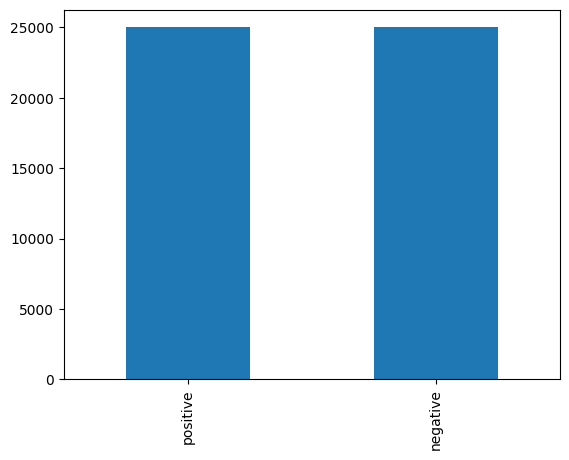

In [73]:
# Visualize the positive and negative reviews as a plot
df['sentiment'].value_counts().plot(kind='bar')


In [74]:
# Remove HTML tags and store both the reviews and sentiments in a new dataframe
print(df['review'][1])
import re
for i in range(len(df)):
    df['review'][i] = re.sub('<.*?>', '', df['review'][i])
print(df['review'][1])

A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.
A

# 1. Simple Sentiment Analysis using RNN

In [75]:
! pip install torch==1.8.0 torchtext==0.9.0


/home/vishwa/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/vishwa/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [76]:
# ! pip install torch==1.8.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html
# pip install torch==1.8.0+cu111 torchvision==0.9.0+cu111 torchaudio==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html

In [77]:
import torch
import torchtext

In [78]:
torchtext.__version__

'0.9.0'

In [79]:
from torchtext.legacy import data

In [80]:
SEED = 1234

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

text = data.Field(tokenize='spacy', tokenizer_language='en_core_web_sm')
label = data.LabelField(dtype= torch.float)


In [81]:
from torchtext.legacy import datasets

train_data, test_data = datasets.IMDB.splits(text, label)

In [82]:
print(len(train_data))
print(len(test_data))

25000
25000


In [83]:
print(train_data.examples[0].text)

['This', 'is', 'a', 'really', 'interesting', 'movie', '.', 'It', 'is', 'an', 'action', 'movie', 'with', 'comedy', 'mixed', 'in', '.', 'Foxx', 'teams', 'up', 'with', 'comedian', 'Epps', 'in', 'this', 'movie', 'to', 'give', 'it', 'a', 'comedic', 'spin', '.', 'It', 'will', 'keep', 'you', 'wondering', 'what', 's', 'going', 'to', 'happen', 'to', 'Foxx', 'next', '.', 'It', 'was', 'a', 'well', 'shot', 'movie', ',', 'the', 'director', 'used', 'the', 'right', 'colors', 'in', 'this', 'movie(dark', 'blue', 'colors', ')', 'to', 'give', 'it', 'the', 'right', 'kind', 'of', 'feel', '.', 'Kimberly', 'Elise', 'also', 'starred', 'in', 'this', 'movie', 'and', 'it', 'is', 'always', 'a', 'pleasure', 'to', 'see', 'her', 'on', 'the', 'big', 'screen', '.', 'She', 'plays', 'her', 'role', 'well', '.', 'Even', 'Jamie', 'Kennedy', 'is', 'in', 'this', 'movie', '.', 'It', "'s", 'worth', 'seeing', 'it', 'you', 'have', "n't", 'seen', 'it', '.', 'It', "'s", 'definitely', 'worth', 'having', 'if', 'you', 'are', 'a', 'Ja

In [84]:
print(vars(train_data.examples[0]))

{'text': ['This', 'is', 'a', 'really', 'interesting', 'movie', '.', 'It', 'is', 'an', 'action', 'movie', 'with', 'comedy', 'mixed', 'in', '.', 'Foxx', 'teams', 'up', 'with', 'comedian', 'Epps', 'in', 'this', 'movie', 'to', 'give', 'it', 'a', 'comedic', 'spin', '.', 'It', 'will', 'keep', 'you', 'wondering', 'what', 's', 'going', 'to', 'happen', 'to', 'Foxx', 'next', '.', 'It', 'was', 'a', 'well', 'shot', 'movie', ',', 'the', 'director', 'used', 'the', 'right', 'colors', 'in', 'this', 'movie(dark', 'blue', 'colors', ')', 'to', 'give', 'it', 'the', 'right', 'kind', 'of', 'feel', '.', 'Kimberly', 'Elise', 'also', 'starred', 'in', 'this', 'movie', 'and', 'it', 'is', 'always', 'a', 'pleasure', 'to', 'see', 'her', 'on', 'the', 'big', 'screen', '.', 'She', 'plays', 'her', 'role', 'well', '.', 'Even', 'Jamie', 'Kennedy', 'is', 'in', 'this', 'movie', '.', 'It', "'s", 'worth', 'seeing', 'it', 'you', 'have', "n't", 'seen', 'it', '.', 'It', "'s", 'definitely', 'worth', 'having', 'if', 'you', 'are',

In [85]:
import random

train_data, valid_data = train_data.split(random_state = random.seed(SEED))

In [86]:
print(len(train_data))
print(len(valid_data))
print(len(test_data))

17500
7500
25000


In [87]:
MAX_VOCAB_SIZE = 25_000

text.build_vocab(train_data, max_size = MAX_VOCAB_SIZE)
label.build_vocab(train_data)

In [88]:
print(len(text.vocab))
print(len(label.vocab))

25002
2


In [89]:
print(text.vocab.freqs.most_common(20))

[('the', 200034), (',', 190928), ('.', 164638), ('a', 108280), ('and', 107754), ('of', 99779), ('to', 92498), ('is', 75666), ('in', 60517), ('I', 53876), ('it', 53038), ('that', 48383), ('"', 44402), ("'s", 43030), ('this', 41962), ('-', 37087), ('/><br', 35217), ('was', 34767), ('as', 30123), ('with', 29699)]


In [90]:
print(text.vocab.stoi)

defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x7f03d04f1bb0>>, {'<unk>': 0, '<pad>': 1, 'the': 2, ',': 3, '.': 4, 'a': 5, 'and': 6, 'of': 7, 'to': 8, 'is': 9, 'in': 10, 'I': 11, 'it': 12, 'that': 13, '"': 14, "'s": 15, 'this': 16, '-': 17, '/><br': 18, 'was': 19, 'as': 20, 'with': 21, 'movie': 22, 'for': 23, 'film': 24, 'The': 25, 'but': 26, '(': 27, "n't": 28, 'on': 29, ')': 30, 'you': 31, 'are': 32, 'not': 33, 'have': 34, 'his': 35, 'be': 36, 'he': 37, 'one': 38, 'by': 39, 'at': 40, 'all': 41, '!': 42, 'an': 43, 'who': 44, 'from': 45, 'like': 46, 'they': 47, 'so': 48, 'her': 49, 'or': 50, 'has': 51, 'about': 52, 'It': 53, 'out': 54, 'just': 55, "'": 56, 'do': 57, '?': 58, 'some': 59, 'good': 60, 'more': 61, 'very': 62, 'would': 63, 'up': 64, 'what': 65, 'This': 66, 'there': 67, 'time': 68, 'can': 69, 'which': 70, 'when': 71, 'she': 72, 'story': 73, 'really': 74, 'only': 75, 'if': 76, 'had': 77, 'see': 78, 'their': 79, 'were': 80, 'even': 81, 

In [91]:
BATCH_SIZE = 64

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits((train_data, valid_data, test_data), batch_size = BATCH_SIZE, device = device)

cuda


# Building the Model

In [92]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, text):
        embedded = self.embedding(text)
        output, hidden = self.rnn(embedded)
        
        assert torch.equal(output[-1,:,:], hidden.squeeze(0))

        return self.fc(hidden.squeeze(0))

In [93]:
INPUT_DIM = len(text.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = 1

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)

In [94]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 2,592,105 trainable parameters


In [95]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

In [96]:
criterion = nn.BCEWithLogitsLoss()

In [97]:
model = model.to(device)
criterion = criterion.to(device)

In [98]:
def binary_accuracy(preds, y):
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc

In [99]:
def train(model, iterator, optimizer, criterion):
    epoch_loss =0
    epoch_acc = 0

    model.train()

    for batch in iterator:
        optimizer.zero_grad()
        predictions = model(batch.text).squeeze(1)
        loss = criterion(predictions, batch.label)
        acc = binary_accuracy(predictions, batch.label)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [100]:
def evaluate(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():
        for batch in iterator:
            predictions = model(batch.text).squeeze(1)
            loss = criterion(predictions, batch.label)
            acc = binary_accuracy(predictions, batch.label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [101]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time-(elapsed_mins * 60))    
    return elapsed_mins, elapsed_secs


In [102]:
N_EPOCHS = 5

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    start_time = time.time()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut1-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\tValid Loss: {valid_loss:.3f} | Valid Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 0m 22s
	Train Loss: 0.705 | Train Acc: 50.06%
	Valid Loss: 0.695 | Valid Acc: 49.91%
Epoch: 02 | Epoch Time: 0m 23s
	Train Loss: 0.697 | Train Acc: 49.78%
	Valid Loss: 0.699 | Valid Acc: 50.92%
Epoch: 03 | Epoch Time: 0m 28s
	Train Loss: 0.696 | Train Acc: 49.60%
	Valid Loss: 0.694 | Valid Acc: 49.91%
Epoch: 04 | Epoch Time: 0m 31s
	Train Loss: 0.696 | Train Acc: 49.99%
	Valid Loss: 0.694 | Valid Acc: 50.84%
Epoch: 05 | Epoch Time: 0m 30s
	Train Loss: 0.695 | Train Acc: 49.77%
	Valid Loss: 0.700 | Valid Acc: 49.38%


In [103]:
model.load_state_dict(torch.load('tut1-model.pt'))
test_loss, test_acc = evaluate(model, test_iterator, criterion)
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.703 | Test Acc: 39.23%


# Upgraded Sentiment Analysis

In [104]:
import torch
from torchtext.legacy import data

SEED = 1234

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

TEXT = data.Field(tokenize='spacy', tokenizer_language= 'en_core_web_sm', include_lengths = True)
LABEL = data.LabelField(dtype = torch.float)

In [105]:
from torchtext.legacy import datasets

train_data, test_data = datasets.IMDB.splits(TEXT, LABEL)

In [106]:
import random

train_data, valid_data = train_data.split(random_state = random.seed(SEED))

In [107]:
len(train_data), len(valid_data), len(test_data)

(17500, 7500, 25000)

In [108]:
MAX_VOCAB_SIZE = 25_000

TEXT.build_vocab(train_data,
                 max_size = MAX_VOCAB_SIZE,
                 vectors = "glove.6B.100d",
                 unk_init = torch.Tensor.normal_)

In [109]:
LABEL.build_vocab(train_data)

In [110]:
BATCH_SIZE = 64

device = torch.device('cuda'if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data),
    batch_size = BATCH_SIZE,
    sort_within_batch = True,
    device = device
)

In [114]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers,
                 bidirectional, dropout, pad_idx):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
        self.rnn = nn.LSTM(embedding_dim, hidden_dim, num_layers=n_layers,
                           bidirectional=bidirectional, dropout=dropout)
        self.fc = nn.Linear(hidden_dim*2, output_dim)
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, text, text_lengths):

        embedded = self.dropout(self.embedding(text))
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.to('cpu'))
        packed_output, (hidden, cell) = self.rnn(packed_embedded)
        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)
        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1))
        return self.fc(hidden.squeeze(0))
    

In [115]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256    
OUTPUT_DIM = 1
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.5
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, N_LAYERS,
            BIDIRECTIONAL, DROPOUT, PAD_IDX)

In [116]:
def count_parameters():
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters():,} trainable parameters')

The model has 4,810,857 trainable parameters


In [117]:
pretrained_embeddings = TEXT.vocab.vectors
print(pretrained_embeddings.shape)

torch.Size([25002, 100])


In [118]:
model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[-1.1172e-01, -4.9659e-01,  1.6307e-01,  ...,  1.2647e+00,
         -2.7527e-01, -1.3254e-01],
        [-8.5549e-01, -7.2081e-01,  1.3755e+00,  ...,  8.2522e-02,
         -1.1314e+00,  3.9972e-01],
        [-3.8194e-02, -2.4487e-01,  7.2812e-01,  ..., -1.4590e-01,
          8.2780e-01,  2.7062e-01],
        ...,
        [ 1.4688e-01, -1.2980e-03,  3.8734e-02,  ..., -6.2004e-01,
          4.8557e-01,  1.3551e-01],
        [-9.3483e-02,  1.3174e-02,  6.2285e-01,  ..., -1.3413e-01,
         -7.7806e-02, -1.3660e-01],
        [ 5.6881e-03, -7.0701e-02, -8.0381e-02,  ..., -3.2920e-01,
         -1.2983e-02,  7.1585e-02]])

In [122]:
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

print(model.embedding.weight.data[PAD_IDX])

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])


In [123]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

In [124]:
criterion = nn.BCEWithLogitsLoss()

model = model.to(device)
criterion = criterion.to(device)

In [ ]:
def binary_accuracy(preds, y):
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc

In [126]:
def train(model, iterator, optimizer, criterion):

    epoch_loss=0
    epoch_acc=0

    model.train()

    for batch in iterator:
        optimizer.zero_grad()
        text, text_lengths = batch.text
        predictions = model(text, text_lengths).squeeze(1)
        loss = criterion(predictions, batch.label)
        acc = binary_accuracy(predictions, batch.label)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()
    
    return epoch_loss/len(iterator), epoch_acc / len(iterator)


In [127]:
def evaluate(model, iterator, criterion):
    epoch_loss=0
    epoch_acc=0

    model.eval()

    with torch.no_grad():

        for batch in iterator:
            text, text_lengths = batch.text
            predictions = model(text, text_lengths).squeeze(1)
            loss = criterion(predictions, batch.label)
            acc = binary_accuracy(predictions, batch.label)
            epoch_loss += loss.item()
            epoch_acc += acc.item()
    
    return epoch_loss/len(iterator), epoch_acc / len(iterator)

In [128]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time/60)
    elapsed_secs = int(elapsed_time-(elapsed_mins*60))
    return elapsed_mins, elapsed_secs

In [129]:
N_EPOCHS = 5
best_valid_loss = float('inf')
for epoch in range(N_EPOCHS):
    start_time = time.time()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\tValid Loss: {valid_loss:.3f} | Valid Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 0m 59s
	Train Loss: 0.678 | Train Acc: 58.08%
	Valid Loss: 0.669 | Valid Acc: 56.70%
Epoch: 02 | Epoch Time: 1m 5s
	Train Loss: 0.686 | Train Acc: 55.12%
	Valid Loss: 0.674 | Valid Acc: 58.39%
Epoch: 03 | Epoch Time: 1m 9s
	Train Loss: 0.556 | Train Acc: 71.22%
	Valid Loss: 0.408 | Valid Acc: 83.49%
Epoch: 04 | Epoch Time: 1m 9s
	Train Loss: 0.405 | Train Acc: 82.38%
	Valid Loss: 0.353 | Valid Acc: 85.75%
Epoch: 05 | Epoch Time: 1m 5s
	Train Loss: 0.366 | Train Acc: 84.68%
	Valid Loss: 0.347 | Valid Acc: 86.10%


In [131]:
model.load_state_dict(torch.load('model.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.359 | Test Acc: 85.19%


In [132]:
import spacy
nlp = spacy.load('en_core_web_sm')

def predict_sentiment(model, sentence):
    model.eval()
    tokenized = [tok.text for tok in nlp.tokenizer(sentence)]
    indexed = [TEXT.vocab.stoi[t] for t in tokenized]
    length = [len(indexed)]
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(1)
    length_tensor = torch.LongTensor(length)
    prediction = torch.sigmoid(model(tensor, length_tensor))
    return prediction.item()

In [133]:
predict_sentiment(model, "This film is terrible")

0.05767734721302986

In [134]:
predict_sentiment(model, "This film is great")

0.9616844654083252

# Faster Sentiment Analysis

In [135]:
def generate_bigrams(x):
    n_grams = set(zip(*[x[i:] for i in range(2)]))
    for n_gram in n_grams:
        x.append(' '.join(n_gram))
    return x

In [136]:

generate_bigrams(['This', 'film', 'is', 'terrible'])

['This', 'film', 'is', 'terrible', 'film is', 'is terrible', 'This film']

In [137]:
import torch
from torchtext.legacy import data
from torchtext.legacy import datasets

SEED = 1234

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

TEXT = data.Field(tokenize = 'spacy',
                  tokenizer_language = 'en_core_web_sm',
                  preprocessing = generate_bigrams)

LABEL = data.LabelField(dtype = torch.float)

In [138]:
import random

train_data, test_data = datasets.IMDB.splits(TEXT, LABEL)

train_data, valid_data = train_data.split(random_state = random.seed(SEED))

In [139]:
MAX_VOCAB_SIZE = 25_000

TEXT.build_vocab(train_data, 
                 max_size = MAX_VOCAB_SIZE, 
                 vectors = "glove.6B.100d", 
                 unk_init = torch.Tensor.normal_)

LABEL.build_vocab(train_data)

In [140]:
BATCH_SIZE = 64

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = BATCH_SIZE, 
    device = device)

In [142]:
import torch.nn as nn
import torch.nn.functional as F

class FastText(nn.Module):
    def __init__(self, vocab_size, embedding_dim, output_dim, pad_idx):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
        self.fc = nn.Linear(embedding_dim, output_dim)
    
    def forward(self, text):
        embedded = self.embedding(text)
        embedded = embedded.permute(1,0,2)
        pooled = F.avg_pool2d(embedded, (embedded.shape[1], 1)).squeeze(1)
        return self.fc(pooled)

In [143]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
OUTPUT_DIM = 1
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = FastText(INPUT_DIM, EMBEDDING_DIM, OUTPUT_DIM, PAD_IDX)

In [144]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 2,500,301 trainable parameters


In [145]:
pretrained_embeddings = TEXT.vocab.vectors

model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[-0.1117, -0.4966,  0.1631,  ...,  1.2647, -0.2753, -0.1325],
        [-0.8555, -0.7208,  1.3755,  ...,  0.0825, -1.1314,  0.3997],
        [-0.0382, -0.2449,  0.7281,  ..., -0.1459,  0.8278,  0.2706],
        ...,
        [-0.3324, -0.4652,  0.3749,  ...,  0.2523, -0.4747, -2.7781],
        [ 0.6954,  1.2210,  0.9048,  ...,  0.2641,  0.7425,  0.5804],
        [ 0.0812, -0.9370, -1.9410,  ...,  1.3400,  0.8071,  0.3521]])

In [146]:
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [147]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

In [148]:
criterion = nn.BCEWithLogitsLoss()

model = model.to(device)
criterion = criterion.to(device)

In [149]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

In [150]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        
        predictions = model(batch.text).squeeze(1)
        
        loss = criterion(predictions, batch.label)
        
        acc = binary_accuracy(predictions, batch.label)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [151]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:

            predictions = model(batch.text).squeeze(1)
            
            loss = criterion(predictions, batch.label)
            
            acc = binary_accuracy(predictions, batch.label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [152]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [153]:
N_EPOCHS = 5

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut3-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 0m 11s
	Train Loss: 0.687 | Train Acc: 61.43%
	 Val. Loss: 0.635 |  Val. Acc: 70.97%
Epoch: 02 | Epoch Time: 0m 9s
	Train Loss: 0.647 | Train Acc: 74.16%
	 Val. Loss: 0.509 |  Val. Acc: 75.94%
Epoch: 03 | Epoch Time: 0m 10s
	Train Loss: 0.573 | Train Acc: 79.58%
	 Val. Loss: 0.426 |  Val. Acc: 80.29%
Epoch: 04 | Epoch Time: 0m 10s
	Train Loss: 0.497 | Train Acc: 83.84%
	 Val. Loss: 0.383 |  Val. Acc: 83.76%
Epoch: 05 | Epoch Time: 0m 10s
	Train Loss: 0.432 | Train Acc: 87.00%
	 Val. Loss: 0.364 |  Val. Acc: 85.52%


In [154]:
model.load_state_dict(torch.load('tut3-model.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.383 | Test Acc: 85.45%


# CNN based model

In [156]:
import torch
from torchtext.legacy import data
from torchtext.legacy import datasets
import random
import numpy as np

SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

TEXT = data.Field(tokenize = 'spacy', 
                  tokenizer_language = 'en_core_web_sm',
                  batch_first = True)
LABEL = data.LabelField(dtype = torch.float)

train_data, test_data = datasets.IMDB.splits(TEXT, LABEL)

train_data, valid_data = train_data.split(random_state = random.seed(SEED))

In [ ]:
MAX_VOCAB_SIZE = 25_000

TEXT.build_vocab(train_data, 
                 max_size = MAX_VOCAB_SIZE, 
                 vectors = "glove.6B.100d", 
                 unk_init = torch.Tensor.normal_)

LABEL.build_vocab(train_data)

In [ ]:
BATCH_SIZE = 64

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = BATCH_SIZE, 
    device = device)